# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# Criando duas faixas de latitude
sinasc_raw['Latitude_Band'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Above -10.5', 'Below -10.5')

# Agrupando os dados pelas faixas de latitude e aplicando as operações estatísticas
grouped = sinasc_raw.groupby('Latitude_Band').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibindo o resultado
print(grouped)



              IDADEMAE                                                 \
                   sum       mean min max median       std        var   
Latitude_Band                                                           
Above -10.5     365094  26.014964  11  52   25.0  6.447663  41.572355   
Below -10.5     340167  26.178775  12  53   26.0  6.320171  39.944563   

                   PESO                                              \
                    sum         mean  min   max  median         std   
Latitude_Band                                                         
Above -10.5    45555148  3246.055864  295  5190  3275.0  556.487709   
Below -10.5    42101809  3240.096121  258  5985  3270.0  531.794694   

                              
                         var  
Latitude_Band                 
Above -10.5    309678.570242  
Below -10.5    282805.596163  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Criando duas faixas de área dos municípios
sinasc_raw['Area_Band'] = np.where(sinasc_raw['munResArea'] > 3000, 'Above 3000', 'Below 3000')

# Agrupando os dados pelas faixas de área e aplicando as operações estatísticas
grouped_area = sinasc_raw.groupby('Area_Band').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibindo o resultado
print(grouped_area)


           QTDFILVIVO                                                  \
                  sum      mean  min   max median       std       var   
Area_Band                                                               
Above 3000    22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   
Below 3000     4774.0  0.924298  0.0  30.0    1.0  1.075338  1.156352   

           QTDFILMORT                                                  
                  sum      mean  min   max median       std       var  
Area_Band                                                              
Above 3000     5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743  
Below 3000     1261.0  0.244949  0.0   4.0    0.0  0.551262  0.303889  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
# Criando faixas de altitude dos municípios
sinasc_raw['Altitude_Band'] = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 200, 500, np.inf], labels=['Below 200m', '200m to 500m', 'Above 500m'])

# Agrupando os dados pelas faixas de altitude e aplicando as operações estatísticas
grouped_altitude = sinasc_raw.groupby('Altitude_Band', observed=True).agg({
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibindo o resultado
print(grouped_altitude)



              QTDPARTNOR                                                  \
                     sum      mean  min   max median       std       var   
Altitude_Band                                                              
Below 200m       12325.0  0.646608  0.0  40.0    0.0  1.226105  1.503334   
200m to 500m      1724.0  0.382941  0.0  41.0    0.0  1.214023  1.473852   
Above 500m         522.0  0.329338  0.0   9.0    0.0  0.840907  0.707125   

              QTDPARTCES                                                  
                     sum      mean  min   max median       std       var  
Altitude_Band                                                             
Below 200m        9406.0  0.491663  0.0  12.0    0.0  0.742181  0.550832  
200m to 500m      2792.0  0.617699  0.0   5.0    0.0  0.751392  0.564590  
Above 500m         938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


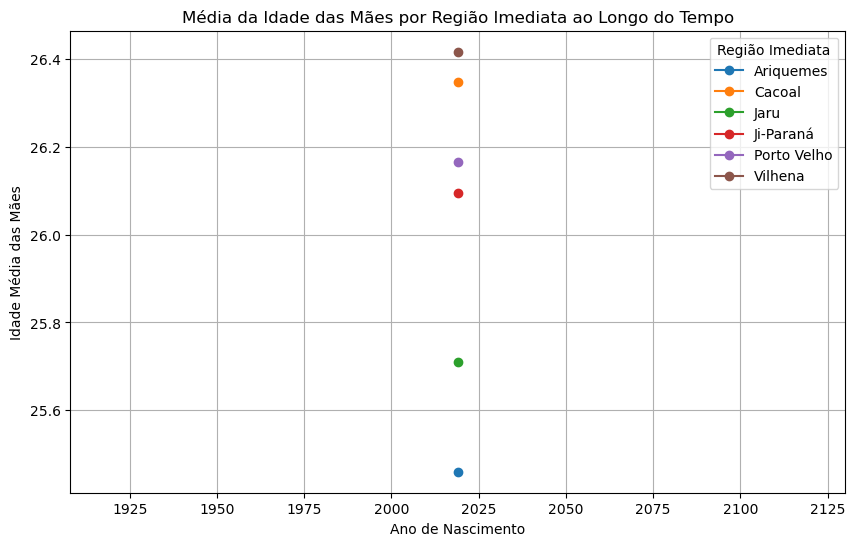

In [14]:
# Dicionário das regiões imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho", "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho", "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho", "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes", "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes", "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes", "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes", "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru", "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru", "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná", "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná", "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná", "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná", "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná", "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná", "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná", "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal", "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal", "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal", "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal", "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal", "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal", "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal", "Vilhena": "Vilhena",
    "Cabixi": "Vilhena", "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena", "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena", "Pimenteiras do Oeste": "Vilhena"
}

# Mapeando cada município para sua região imediata
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Conversão de DTNASC para datetime e extração do ano para agrupamento
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%Y-%m-%d')
sinasc_raw['Ano_Nascimento'] = sinasc_raw['DTNASC'].dt.year

# Agrupando por região e ano, calculando a média da idade
age_by_region = sinasc_raw.groupby(['Regiao_Imediata', 'Ano_Nascimento'])['IDADEMAE'].mean().unstack()

# Plotando
age_by_region.T.plot(figsize=(10, 6), marker='o')
plt.title('Média da Idade das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [17]:

# Dicionário com mapeamento dos municípios e seus IDHs
idh_dict = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    # Adicione outros municípios conforme necessário
}

# Mapeando o IDH no DataFrame
sinasc_raw['IDH'] = sinasc_raw['munResNome'].map(idh_dict)

# Criando faixas de IDH
sinasc_raw['IDH_Band'] = pd.cut(sinasc_raw['IDH'], bins=[0, 0.499, 0.599, 0.699, 0.799, 1],
                        labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

# Filtrando apenas colunas numéricas
numeric_cols = sinasc_raw.select_dtypes(include=[np.number]).columns.tolist()

# Agrupamento por faixas de IDH e aplicando média apenas nas colunas numéricas
grouped_data = sinasc_raw.groupby('IDH_Band', observed=True)[numeric_cols].mean()

print(grouped_data)


          ORIGEM      CODESTAB     CODMUNNASC   LOCNASC   IDADEMAE  ESTCIVMAE  \
IDH_Band                                                                        
Alto         1.0  3.479376e+06  111634.088567  1.009203  26.393065   2.549094   

             CODOCUPMAE  QTDFILVIVO  QTDFILMORT      CODMUNRES  ...  TPROBSON  \
IDH_Band                                                        ...             
Alto      785568.274222    1.065172    0.280558  110018.266951  ...  4.462343   

          PARIDADE  KOTELCHUCK       CONTADOR  munResLat  munResLon  \
IDH_Band                                                              
Alto      0.636163    5.131046  740271.414783  -9.842941 -62.854529   

           munResAlt    munResArea  Ano_Nascimento      IDH  
IDH_Band                                                     
Alto      166.814474  24018.730488          2019.0  0.73006  

[1 rows x 56 columns]


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [19]:
ifdm_dict = {
    'Porto Velho': 0.7257,
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    # Adicione outros municípios conforme necessário
}

# Mapeando IFDM no DataFrame
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(ifdm_dict)

# Criando faixas de IFDM
sinasc_raw['IFDM_Band'] = pd.cut(sinasc_raw['IFDM'], bins=[0, 0.6, 0.8, 1], labels=['Regular', 'Moderado', 'Alto'])

# Agrupamento por faixas de IFDM e aplicando média apenas nas colunas numéricas
numeric_cols = sinasc_raw.select_dtypes(include=[np.number]).columns.tolist()
# Agrupamento por faixas de IFDM com a opção observed definida explicitamente
grouped_data = sinasc_raw.groupby('IFDM_Band', observed=True)[numeric_cols].mean()

print(grouped_data)



           ORIGEM      CODESTAB     CODMUNNASC  LOCNASC   IDADEMAE  ESTCIVMAE  \
IFDM_Band                                                                       
Moderado      1.0  3.352165e+06  111409.869224  1.00879  26.261678    2.56645   

              CODOCUPMAE  QTDFILVIVO  QTDFILMORT      CODMUNRES  ...  \
IFDM_Band                                                        ...   
Moderado   793301.687373     1.04487    0.273072  110016.490834  ...   

           PARIDADE  KOTELCHUCK       CONTADOR  munResLat  munResLon  \
IFDM_Band                                                              
Moderado   0.636991    5.050728  741333.278189  -9.921005 -62.809313   

            munResAlt    munResArea  Ano_Nascimento      IDH      IFDM  
IFDM_Band                                                               
Moderado   164.537167  21204.443219          2019.0  0.73006  0.730394  

[1 rows x 57 columns]


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [21]:
pib_dict = {
    'Porto Velho': 17912070,
    'Ji-Paraná': 3783972,
    'Vilhena': 2831175,
    'Ariquemes': 2579830,
    'Cacoal': 2261644,
    # Adicione outros municípios conforme necessário
}

# Mapeando PIB no DataFrame
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(pib_dict)

# Criando faixas de PIB
bins = [0, 500000, 1000000, 2000000, float('inf')]
labels = ['Até 500 mil', '500 mil a 1 milhão', '1 a 2 milhões', 'Acima de 2 milhões']
sinasc_raw['PIB_Band'] = pd.cut(sinasc_raw['PIB'], bins=bins, labels=labels)

# Filtrando apenas colunas numéricas
numeric_cols = sinasc_raw.select_dtypes(include=[np.number]).columns.tolist()

# Agrupando por faixas de PIB com a opção observed definida explicitamente
grouped_data = sinasc_raw.groupby('PIB_Band', observed=True)[numeric_cols].mean()

print(grouped_data)


                    ORIGEM      CODESTAB     CODMUNNASC   LOCNASC   IDADEMAE  \
PIB_Band                                                                       
Acima de 2 milhões     1.0  3.383417e+06  111465.966497  1.009143  26.304402   

                    ESTCIVMAE    CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
PIB_Band                                                              
Acima de 2 milhões   2.567203  793980.23193    1.052661    0.275976   

                       CODMUNRES  ...  KOTELCHUCK     CONTADOR  munResLat  \
PIB_Band                          ...                                       
Acima de 2 milhões  110016.43012  ...    5.077978  741370.4343   -9.85034   

                    munResLon  munResAlt    munResArea  Ano_Nascimento  \
PIB_Band                                                                 
Acima de 2 milhões -62.874712  163.67372  21806.423555          2019.0   

                        IDH      IFDM           PIB  
PIB_Band                            

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Desigualdades Regionais: A distribuição do PIB pode mostrar quais municípios têm economias mais robustas e podem indicar desigualdades regionais. Por exemplo, municípios com PIBs mais altos podem ter melhores infraestruturas e serviços, enquanto os de PIBs mais baixos podem indicar regiões que precisam de mais investimentos.

- Relação PIB e Qualidade de Vida: Pode-se explorar se há uma correlação entre o PIB dos municípios e indicadores de qualidade de vida ou saúde, como o IDH e IFDM já analisados. Isso poderia indicar se um maior PIB está associado a melhores condições de vida.